# Viridicle

In [9]:
#pip install viridicle
from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches
import viridicle

import graphs

## (5,2) Model

In [10]:
#Alliance Matrix - eating 2, always getting eaten by 2. Eating 0/2 that eat you. 

A = np.array([[0, 1, 1, 0, 0],
              [0, 0, 1, 1, 0],
              [0, 0, 0, 1, 1],
              [1, 0, 0, 0, 1],
              [1, 1, 0, 0, 0]])

B = np.matmul(A, A)
print(B)

[[0 0 1 2 1]
 [1 0 0 1 2]
 [2 1 0 0 1]
 [1 2 1 0 0]
 [0 1 2 1 0]]


In [11]:
%matplotlib inline

from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plot
import numpy as np
import viridicle

import graphs

# Allow larger videos than default limit
matplotlib.rcParams['animation.embed_limit'] = 30_000_000

# Set the type of model to run
N, R = (5,2)
# Diffusion rate
DIFFUSION_RATE = 0.4
# Whether to allow empty sites
ALLOW_EMPTY_SITES = True
# Lattice width
WIDTH = 256
# Graph type; choices are {'klein', 'lattice', 'sphere'}
GRAPH = 'lattice'

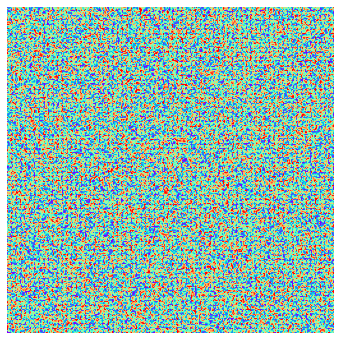

In [12]:
# Initialize rules tensor
beta = viridicle.may_leonard_rules(N, R, DIFFUSION_RATE, empty_zero=ALLOW_EMPTY_SITES)
geo_class = {
    'klein': graphs.KleinGeography,
    'lattice': viridicle.LatticeGeography,
    'sphere': graphs.SphericalGeography,
}[GRAPH]
# Initialize model
geo = geo_class((WIDTH, WIDTH), beta)

# Display system initial state
plot.figure(figsize=(6, 6))
plot.imshow(geo.sites, cmap = 'rainbow')
plot.axis('off')

plot.show()

In [13]:
counts, record = geo.run(400.0, return_sites=True, report_every=2.0)

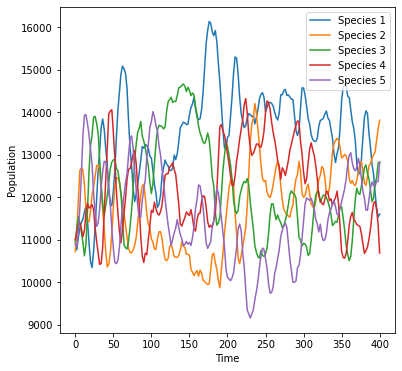

In [14]:
plot.figure(figsize=(6, 6))
for s in range(1, N + 1):
    plot.plot(
        np.arange(0.0, 401.0, 2.0),
        counts[:, s],
        label=f'Species {s}',
    )
plot.xlabel('Time')
plot.ylabel('Population')
plot.legend()
plot.savefig('viridicle52time.pdf', dpi=400)   
plot.show()

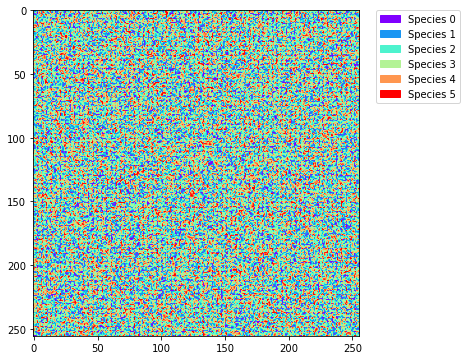

In [15]:
# Syntax taken from:
# https://stackoverflow.com/questions/51702749/numpy-array-as-video-in-jupyter-notebook

values = np.unique(record[0,:,:].ravel())

fig = plot.figure(figsize=(6, 6))
im = plot.imshow(record[0, :, :], cmap = 'rainbow')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Species {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plot.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )



In [ ]:
plot.axis('off')

plot.close()

def init():
    im.set_data(record[0, :, :])

def animate(i):
    im.set_data(record[i, :, :])
    return im

anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=record.shape[0],
    interval=50
)
HTML(anim.to_html5_video())

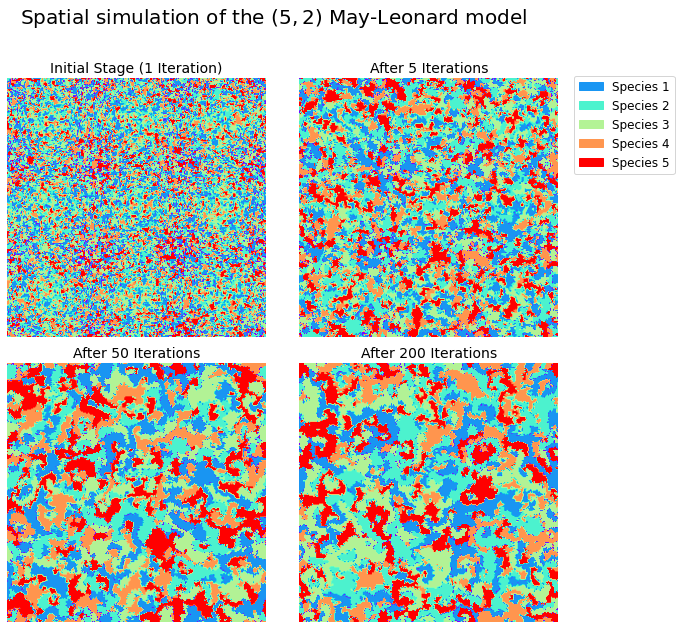

In [16]:
fig, ax = plot.subplots(2,2,figsize=(10,10))
plot.subplots_adjust(hspace = 0.1, wspace = 0.1)          #space plots nicely
plot.legend(handles=patches[1:], bbox_to_anchor=(1.45, 2.11), loc='upper right', fontsize =12, borderaxespad=0. )
fig.suptitle(r'Spatial simulation of the $(5,2)$ May-Leonard model', fontsize =20) # or plt.suptitle('Main title')
ax[0][0].set_title(r'Initial Stage (1 Iteration)',fontsize=14)
ax[0][0].axis('off')
ax[0][0].imshow(record[1,:,:], cmap = 'rainbow')
ax[0][1].set_title(r'After 5 Iterations',fontsize=14)
ax[0][1].axis('off')
ax[0][1].imshow(record[5,:,:], cmap = 'rainbow')
ax[1][0].set_title(r'After 50 Iterations',fontsize=14)
ax[1][0].axis('off')
ax[1][0].imshow(record[50,:,:], cmap = 'rainbow')
ax[1][1].set_title(r'After 200 Iterations',fontsize=14)
ax[1][1].imshow(record[200,:,:], cmap = 'rainbow')
plot.axis('off')
plot.savefig('viridicle52.pdf', dpi=400, bbox_inches='tight')    

## (5,3) Model

In [17]:
#Alliance Matrix - eating 3, always getting eaten by 3. eating 2/3 that eat you.

A = np.array([[0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [1, 0, 0, 1, 1],
              [1, 1, 0, 0, 1],
              [1, 1, 1, 0, 0]])

B = np.matmul(A, A)
print(B)

[[2 1 1 2 3]
 [3 2 1 1 2]
 [2 3 2 1 1]
 [1 2 3 2 1]
 [1 1 2 3 2]]


In [18]:
%matplotlib inline

from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plot
import numpy as np
import viridicle

import graphs

# Allow larger videos than default limit
matplotlib.rcParams['animation.embed_limit'] = 30_000_000

# Set the type of model to run
N, R = (5,3)
# Diffusion rate
DIFFUSION_RATE = 0.4
# Whether to allow empty sites
ALLOW_EMPTY_SITES = True
# Lattice width
WIDTH = 256
# Graph type; choices are {'klein', 'lattice', 'sphere'}
GRAPH = 'lattice'

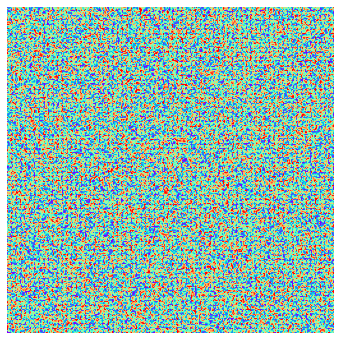

In [26]:
# Initialize rules tensor
beta = viridicle.may_leonard_rules(N, R, DIFFUSION_RATE, empty_zero=ALLOW_EMPTY_SITES)
geo_class = {
    'klein': graphs.KleinGeography,
    'lattice': viridicle.LatticeGeography,
    'sphere': graphs.SphericalGeography,
}[GRAPH]
# Initialize model
geo = geo_class((WIDTH, WIDTH), beta)

# Display system initial state
plot.figure(figsize=(6, 6))
plot.imshow(geo.sites, cmap = 'rainbow')
plot.axis('off')

plot.show()

In [27]:
counts, record = geo.run(400.0, return_sites=True, report_every=2.0)

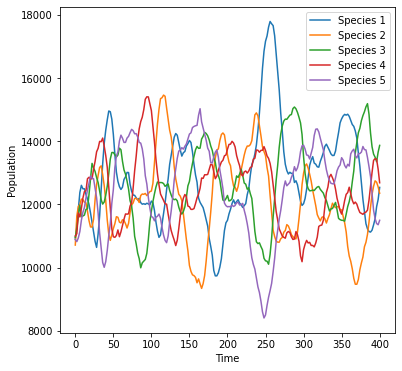

In [28]:
plot.figure(figsize=(6, 6))
for s in range(1, N + 1):
    plot.plot(
        np.arange(0.0, 401.0, 2.0),
        counts[:, s],
        label=f'Species {s}',
    )
plot.xlabel('Time')
plot.ylabel('Population')
plot.legend()
plot.savefig('viridicle53time.pdf', dpi=400)   
plot.show()

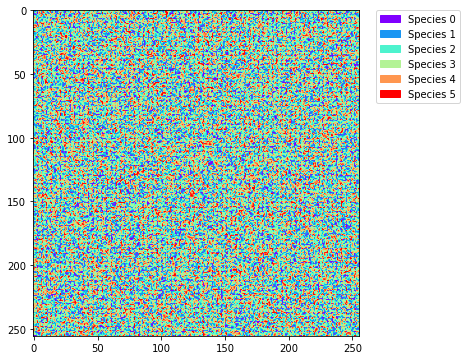

In [29]:
# Syntax taken from:
# https://stackoverflow.com/questions/51702749/numpy-array-as-video-in-jupyter-notebook

values = np.unique(record[0,:,:].ravel())

fig = plot.figure(figsize=(6, 6))
im = plot.imshow(record[0, :, :], cmap = 'rainbow')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Species {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plot.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )



In [ ]:
plot.axis('off')

plot.close()

def init():
    im.set_data(record[0, :, :])

def animate(i):
    im.set_data(record[i, :, :])
    return im

anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=record.shape[0],
    interval=50
)
HTML(anim.to_html5_video())

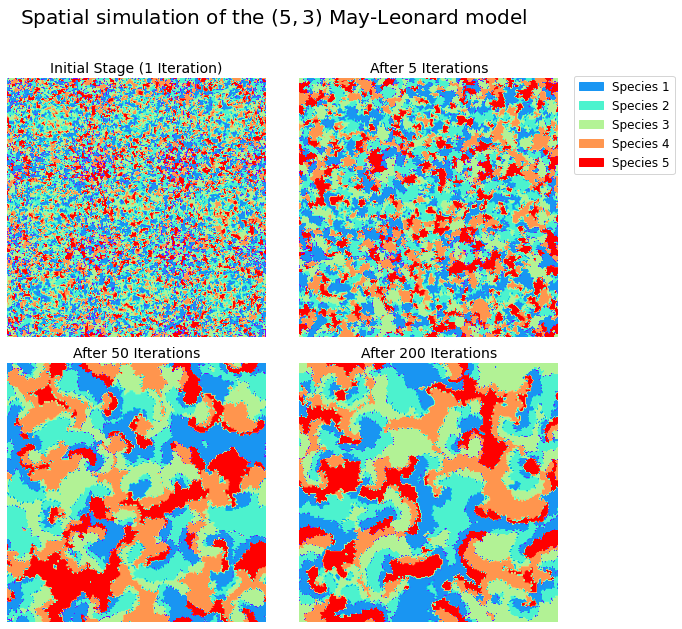

In [30]:
fig, ax = plot.subplots(2,2,figsize=(10,10))
plot.subplots_adjust(hspace = 0.1, wspace = 0.1)          #space plots nicely
plot.legend(handles=patches[1:], bbox_to_anchor=(1.45, 2.11), loc='upper right', fontsize =12, borderaxespad=0. )
fig.suptitle(r'Spatial simulation of the $(5,3)$ May-Leonard model', fontsize =20) # or plt.suptitle('Main title')
ax[0][0].set_title(r'Initial Stage (1 Iteration)',fontsize=14)
ax[0][0].axis('off')
ax[0][0].imshow(record[1,:,:], cmap = 'rainbow')
ax[0][1].set_title(r'After 5 Iterations',fontsize=14)
ax[0][1].axis('off')
ax[0][1].imshow(record[5,:,:], cmap = 'rainbow')
ax[1][0].set_title(r'After 50 Iterations',fontsize=14)
ax[1][0].axis('off')
ax[1][0].imshow(record[50,:,:], cmap = 'rainbow')
ax[1][1].set_title(r'After 200 Iterations',fontsize=14)
ax[1][1].imshow(record[200,:,:], cmap = 'rainbow')
plot.axis('off')
plot.savefig('viridicle53.pdf', dpi=400, bbox_inches='tight')    

## (6,3) Model

In [31]:
#Alliance Matrix

A = np.array([[0, 1, 1, 1, 0, 0],
              [0, 0, 1, 1, 1, 0],
              [0, 0, 0, 1, 1, 1],
              [1, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 1],
              [1, 1, 1, 0, 0, 0]])

B = np.matmul(A, A)
print(B)

[[1 0 1 2 3 2]
 [2 1 0 1 2 3]
 [3 2 1 0 1 2]
 [2 3 2 1 0 1]
 [1 2 3 2 1 0]
 [0 1 2 3 2 1]]


In [32]:
%matplotlib inline

from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plot
import numpy as np
import viridicle

import graphs

# Allow larger videos than default limit
matplotlib.rcParams['animation.embed_limit'] = 30_000_000

# Set the type of model to run
N, R = (6,3)
# Diffusion rate
DIFFUSION_RATE = 0.6
# Whether to allow empty sites
ALLOW_EMPTY_SITES = True
# Lattice width
WIDTH = 256
# Graph type; choices are {'klein', 'lattice', 'sphere'}
GRAPH = 'lattice'

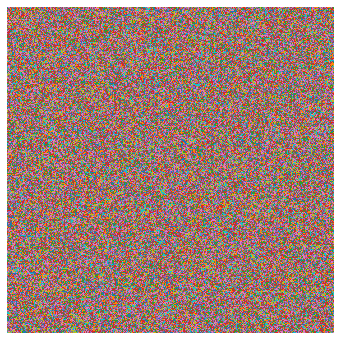

In [33]:
# Initialize rules tensor
beta = viridicle.may_leonard_rules(N, R, DIFFUSION_RATE, empty_zero=ALLOW_EMPTY_SITES)
geo_class = {
    'klein': graphs.KleinGeography,
    'lattice': viridicle.LatticeGeography,
    'sphere': graphs.SphericalGeography,
}[GRAPH]
# Initialize model
geo = geo_class((WIDTH, WIDTH), beta)

# Display system initial state
plot.figure(figsize=(6, 6))
plot.imshow(geo.sites, cmap = 'tab10')
plot.axis('off')

plot.show()

In [34]:
counts, record = geo.run(400.0, return_sites=True, report_every=2.0)

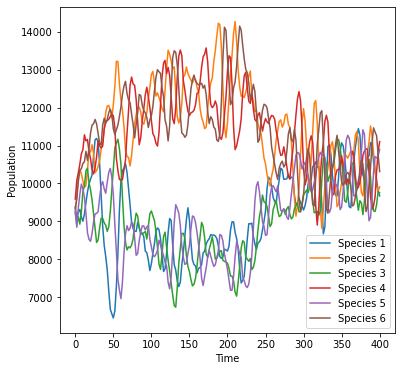

In [35]:
plot.figure(figsize=(6, 6))
for s in range(1, N + 1):
    plot.plot(
        np.arange(0.0, 401.0, 2.0),
        counts[:, s],
        label=f'Species {s}',
    )
plot.xlabel('Time')
plot.ylabel('Population')
plot.legend()
plot.savefig('viridicle63time.pdf', dpi=400)   
plot.show()

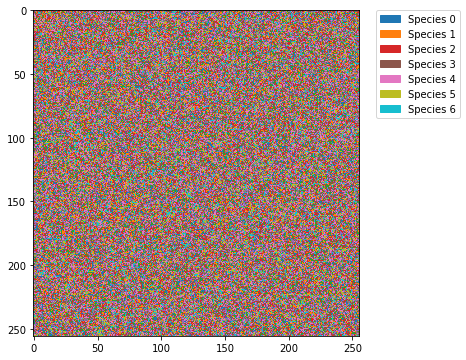

In [36]:
# Syntax taken from:
# https://stackoverflow.com/questions/51702749/numpy-array-as-video-in-jupyter-notebook

values = np.unique(record[0,:,:].ravel())

fig = plot.figure(figsize=(6, 6))
im = plot.imshow(record[0, :, :], cmap = 'tab10')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Species {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plot.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )



In [ ]:
plot.axis('off')

plot.close()

def init():
    im.set_data(record[0, :, :])

def animate(i):
    im.set_data(record[i, :, :])
    return im

anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=record.shape[0],
    interval=50
)
HTML(anim.to_html5_video())

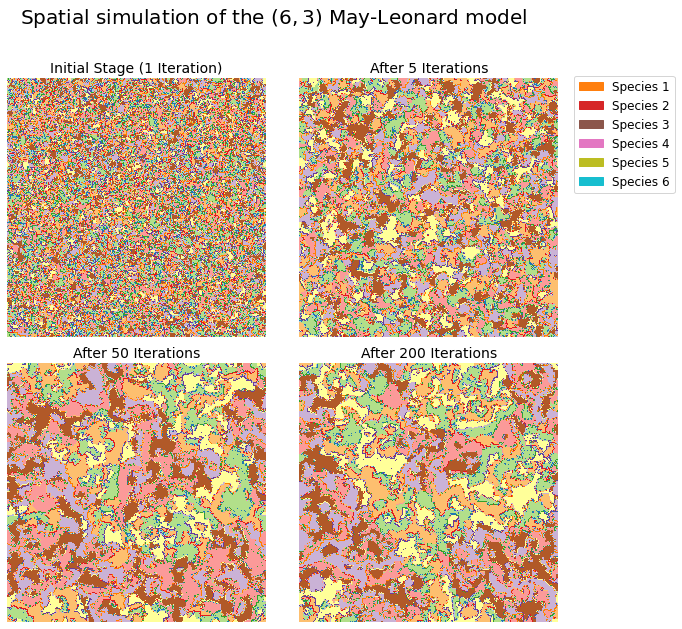

In [37]:
fig, ax = plot.subplots(2,2,figsize=(10,10))
plot.subplots_adjust(hspace = 0.1, wspace = 0.1)          #space plots nicely
plot.legend(handles=patches[1:], bbox_to_anchor=(1.45, 2.11), loc='upper right', fontsize =12, borderaxespad=0. )
fig.suptitle(r'Spatial simulation of the $(6,3)$ May-Leonard model', fontsize =20) # or plt.suptitle('Main title')
ax[0][0].set_title(r'Initial Stage (1 Iteration)',fontsize=14)
ax[0][0].axis('off')
ax[0][0].imshow(record[1,:,:], cmap = 'Paired')
ax[0][1].set_title(r'After 5 Iterations',fontsize=14)
ax[0][1].axis('off')
ax[0][1].imshow(record[5,:,:], cmap = 'Paired')
ax[1][0].set_title(r'After 50 Iterations',fontsize=14)
ax[1][0].axis('off')
ax[1][0].imshow(record[50,:,:], cmap = 'Paired')
ax[1][1].set_title(r'After 200 Iterations',fontsize=14)
ax[1][1].imshow(record[200,:,:], cmap = 'Paired')
plot.axis('off')
plot.savefig('viridicle63.pdf', dpi=400, bbox_inches='tight')    